In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [4]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [5]:
ads_data = pd.read_csv('shared/homeworks/python_ds_miniprojects/6/ads_data.csv')
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [6]:
ads_clients = pd.read_csv('shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [90]:
ads_clients.create_date.describe()

count         122078
unique           222
top       2019-01-07
freq             741
Name: create_date, dtype: object

In [7]:
ads_data.shape

(1000000, 11)

In [8]:
ads_clients.shape

(122078, 4)

### Посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать.

In [9]:
#ads_data1 = ads_data.groupby('ad_id', as_index=False).agg({'event': 'count'})
ads_data1 = ads_data.groupby(['ad_id', 'event'])\
    .agg({'ad_id': 'count'}).rename(columns={'ad_id': 'quant'}).reset_index().fillna(0) \
    .pivot(index='ad_id', columns='event', values='quant').fillna(0).reset_index()
ads_data1

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,0.0,156.0
962,122023,0.0,68.0
963,122031,1.0,138.0


In [10]:
np.mean(ads_data1.view)

923.1316062176165

In [11]:
ads_data1['logview'] = np.log(ads_data1.view)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
ads_data1.head()

event,ad_id,click,view,logview
0,2,1.0,101.0,4.615121
1,3,3.0,184.0,5.214936
2,1902,1.0,41.0,3.713572
3,2064,0.0,35.0,3.555348
4,2132,1.0,58.0,4.060443


In [13]:
ads_data2 = ads_data.groupby(['date', 'event'])\
    .agg({'ad_id': 'count'}).rename(columns={'ad_id': 'quant'}).reset_index() \
#    .pivot(index='ad_id', columns='event', values='quant').fillna(0).reset_index()
ads_data2

,date,event,quant
0,2019-04-01,click,291
1,2019-04-01,view,21782
2,2019-04-02,click,545
3,2019-04-02,view,46572
4,2019-04-03,click,460
5,2019-04-03,view,59023
6,2019-04-04,click,643
7,2019-04-04,view,275092
8,2019-04-05,click,92321
9,2019-04-05,view,427386


In [14]:
ads_data2 = ads_data2.query('event == "view"')
ads_data2

,date,event,quant
1,2019-04-01,view,21782
3,2019-04-02,view,46572
5,2019-04-03,view,59023
7,2019-04-04,view,275092
9,2019-04-05,view,427386
11,2019-04-06,view,60967


In [15]:
ads_data2.quant.rolling(2).mean().round()

1          NaN
3      34177.0
5      52798.0
7     167058.0
9     351239.0
11    244176.0
Name: quant, dtype: float64

In [27]:
ads_data22 = ads_data.query('event == "view"').groupby(['date', 'ad_id']).agg({'event': 'count'}).reset_index()
ads_data22

,date,ad_id,event
0,2019-04-01,2,83
1,2019-04-01,3,158
2,2019-04-01,4922,1211
3,2019-04-01,4933,642
4,2019-04-01,9418,17
...,...,...,...
1926,2019-04-06,119161,14
1927,2019-04-06,119175,27
1928,2019-04-06,121309,111
1929,2019-04-06,121820,11


#### нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

#### Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [29]:
ads_data33 = ads_data22.groupby('date').agg({'event': 'mean'})
ads_data33

,event
date,
2019-04-01,154.482270
2019-04-02,137.786982
2019-04-03,163.952778
2019-04-04,675.901720
2019-04-05,919.109677
2019-04-06,277.122727


In [30]:
ads_data44 = ads_data22.groupby('date').agg({'event': 'mean'}).rolling(2).mean()
ads_data44

,event
date,
2019-04-01,NaN
2019-04-02,146.134626
2019-04-03,150.869880
2019-04-04,419.927249
2019-04-05,797.505699
2019-04-06,598.116202


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


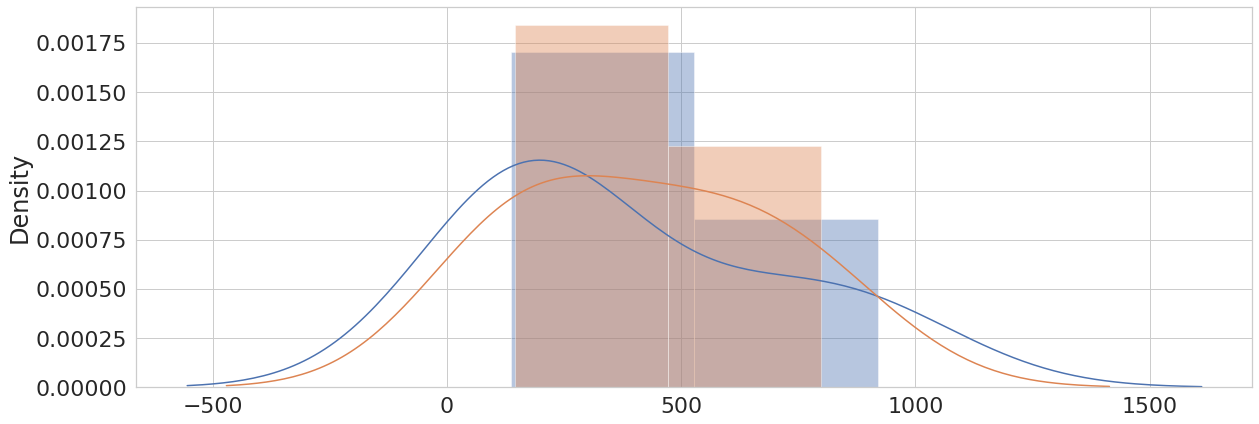

In [34]:
sns.distplot(ads_data33)
sns.distplot(ads_data44)

### Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

### В качестве ответа укажите среднее число дней.

In [35]:
datafull = ads_data.merge(ads_clients, how='left', on='client_union_id')

In [36]:
datafull.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22


In [38]:
#datafull = datafull.assign(diff = datafull.date_x - datafull.create_date)
datafull.dtypes

date_x                    object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
date_y                    object
community_id               int64
create_date               object
dtype: object

In [43]:
datafull['date_x'] = pd.to_datetime(datafull['date_x'])
datafull['create_date'] = pd.to_datetime(datafull['create_date'])
datafull = datafull.assign(diff = datafull.date_x - datafull.create_date)

In [44]:
datafull.dtypes

date_x                    datetime64[ns]
time                              object
event                             object
platform                          object
ad_id                              int64
client_union_id                    int64
campaign_union_id                  int64
ad_cost_type                      object
ad_cost                          float64
has_video                          int64
target_audience_count              int64
date_y                            object
community_id                       int64
create_date               datetime64[ns]
diff                     timedelta64[ns]
dtype: object

In [45]:
datafull.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,diff
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25,97 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13,139 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18,226 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22,38 days


In [69]:
datafull.shape

(1000000, 15)

In [108]:
datafull_111 = datafull.groupby('client_union_id', as_index=False).agg({'diff': 'min'}).sort_values(by='diff', ascending=True)
datafull_111.head(33)

,client_union_id,diff
665,108678,26 days
196,21194,28 days
520,38094,28 days
353,24853,28 days
745,116173,29 days
603,98415,29 days
95,2137,29 days
400,27420,29 days
677,110442,29 days
164,14606,29 days


In [64]:
datafull_111.describe()

,client_union_id,diff
count,838.000000,838
mean,47921.434368,124 days 09:04:43.532219570
std,42915.267571,59 days 08:03:36.669339745
min,1.000000,26 days 00:00:00
25%,21301.250000,73 days 06:00:00
50%,28913.500000,119 days 00:00:00
75%,105267.500000,166 days 18:00:00
max,122078.000000,251 days 00:00:00


#### Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.
#### Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна
#### Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day')
#### Ответ дайте в процентах и округлите до сотых. 

In [71]:
datafull.groupby()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1000000
unique                      6
top       2019-04-05 00:00:00
freq                   519707
first     2019-04-01 00:00:00
last      2019-04-06 00:00:00
Name: date_x, dtype: object

In [95]:
data222 = datafull.groupby('create_date').agg({'create_date': 'count'})
np.sum(data222.create_date)

1000000

In [87]:
datafull.date_x.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1000000
unique                      6
top       2019-04-05 00:00:00
freq                   519707
first     2019-04-01 00:00:00
last      2019-04-06 00:00:00
Name: date_x, dtype: object

In [88]:
datafull.create_date.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1000000
unique                    214
top       2019-01-29 00:00:00
freq                   459428
first     2018-07-28 00:00:00
last      2019-03-06 00:00:00
Name: create_date, dtype: object

In [98]:
datafull.groupby('ad_id').agg({'ad_id': 'count'})

,ad_id
ad_id,
2,102
3,187
1902,42
2064,35
2132,59
...,...
122004,104
122013,156
122023,68


In [103]:
ads_data.groupby('client_union_id').agg({'client_union_id': 'nunique'})

,client_union_id
client_union_id,
1,1
9,1
13,1
16,1
20,1
...,...
122004,1
122013,1
122023,1


In [106]:
838/122078*100

0.6864463703533806